In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmartsalesdataset/bigmart.csv


## Import the dataset and visualize the first five rows of the dataset.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/bigmartsalesdataset/bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

### Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot:xlabel='Column', ylabel='%'>

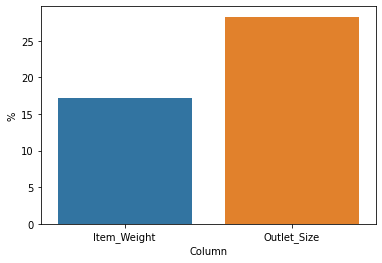

In [4]:
columns_with_nan = df.columns[df.isnull().any()]
column_name = []
percent_nan = []

for column in columns_with_nan:
    column_name.append(column)
    percent_nan.append(round(df[column].isnull().sum()*100/len(df), 2))

table_nan = pd.DataFrame(column_name, columns=["Column"])
table_nan["%"] = percent_nan

table_nan

import seaborn as sns
sns.barplot(data=table_nan, x='Column', y="%")

### Segregating the dataset based on the datatype of the features into numeric and categorical datasets.

In [5]:
numeric_df = df.select_dtypes(exclude='object')
category_df = df.select_dtypes(include='object')

print(f'Shape of numeric data: ', numeric_df.shape)
print(f'Shape of categorical data: ', category_df.shape)

Shape of numeric data:  (8523, 5)
Shape of categorical data:  (8523, 7)


In [6]:
numeric_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [7]:
for column in numeric_df.columns:
    print(f"Number of unique values in {column} = ", df[column].nunique())

Number of unique values in Item_Weight =  415
Number of unique values in Item_Visibility =  7880
Number of unique values in Item_MRP =  5938
Number of unique values in Outlet_Establishment_Year =  9
Number of unique values in Item_Outlet_Sales =  3493


### Checking for Quasi-constant Variables

- Quasi-constant features are the features that are almost constant.
- These features have the same values for a very large subset of the outputs.
- Such features are not very useful for making predictions.

In [8]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.5)
constant_filter.fit(numeric_df.iloc[:, :-1])
print("Number of columns to be retained: ", sum(constant_filter.get_support()))
print("Number of quasi-constant features: ", len(numeric_df.iloc[:, :-1].columns) - sum(constant_filter.get_support()))

qconstant_list = [col for col in numeric_df.iloc[:, :-1].columns if col not in numeric_df.iloc[:, :-1].columns[constant_filter.get_support()]]
print("Quasi-constant feature to be dropped: ", qconstant_list)

Number of columns to be retained:  3
Number of quasi-constant features:  1
Quasi-constant feature to be dropped:  ['Item_Visibility']


In [9]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Though, 'Item_Visibility' feature is found to be quasi constant in nature, the values of 'Item_Visibility' ranges between 0 and 0.32. 
Also, the number of unique values is 7880. Therefore, let us not drop this feature.

- However, considering the fact as the minimum being 0, there is no meaning in analysing an item that has zero visibility. Maybe the items marked 0 were of unknown visibility. Let us check the count of zero values and if necessary treat them by replacing with mean.

In [10]:
zero_rows = numeric_df[numeric_df['Item_Visibility']==0]
print("Number of zero values: ", zero_rows.shape)

Number of zero values:  (526, 5)


In [11]:
numeric_df['Item_Visibility'] = numeric_df['Item_Visibility'].replace(0, numeric_df['Item_Visibility'].mean())

numeric_df.Item_Visibility.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [12]:
numeric_df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
numeric_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.643456,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


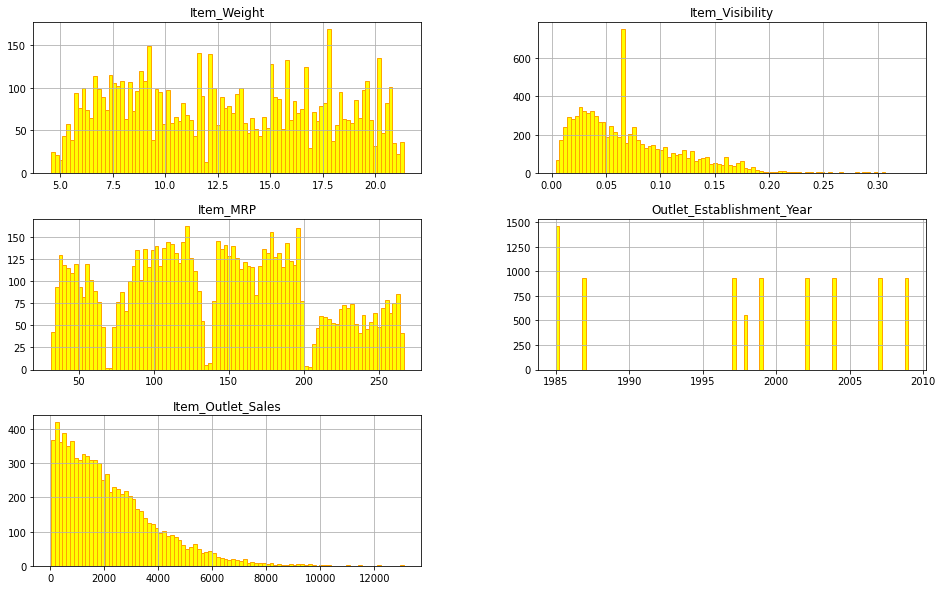

In [14]:
from math import sqrt
fig = numeric_df.hist(bins=round(sqrt(len(numeric_df))), 
                      color="yellow", 
                      edgecolor="orange", 
                      figsize=(16, 10), 
                      grid=True)

In [15]:
numeric_df.isna().any().value_counts()

False    4
True     1
dtype: int64

In [16]:
round(numeric_df.isnull().sum().sort_values(ascending=False)*100/len(numeric_df), 2)

Item_Weight                  17.17
Item_Visibility               0.00
Item_MRP                      0.00
Outlet_Establishment_Year     0.00
Item_Outlet_Sales             0.00
dtype: float64

In [17]:
numeric_df['Item_Weight'] = numeric_df['Item_Weight'].fillna(numeric_df['Item_Weight'].mean())
numeric_df.isna().any().value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False    5
dtype: int64

In [18]:
numeric_df['Outlet_Age'] = 2022 - numeric_df['Outlet_Establishment_Year']

numeric_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
0,9.30,0.016047,249.8092,1999,3735.1380,23
1,5.92,0.019278,48.2692,2009,443.4228,13
2,17.50,0.016760,141.6180,1999,2097.2700,23
3,19.20,0.066132,182.0950,1998,732.3800,24
4,8.93,0.066132,53.8614,1987,994.7052,35


In [19]:
category_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [20]:
category_df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

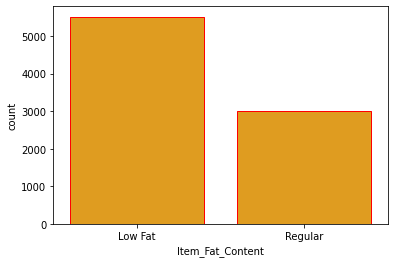

In [21]:
category_df["Item_Fat_Content"] = category_df["Item_Fat_Content"].replace(['LF', 'low fat'], 'Low Fat')
category_df["Item_Fat_Content"] = category_df["Item_Fat_Content"].replace(['reg'], 'Regular')

import seaborn as sns
sns.countplot(data=category_df, x="Item_Fat_Content", color='orange', edgecolor='red')

In [22]:
category_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

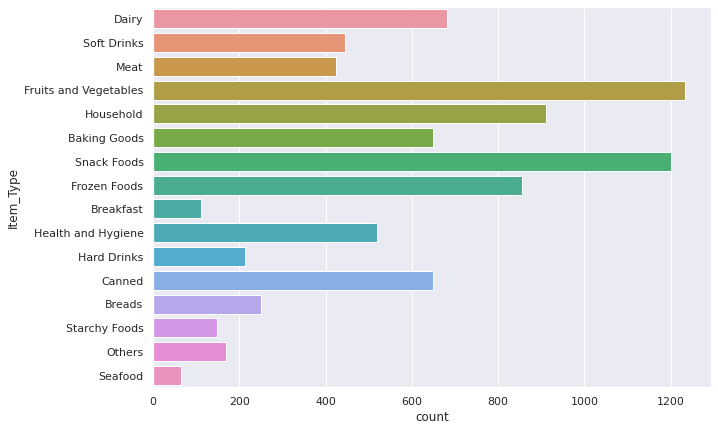

In [23]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.countplot(data=category_df, y='Item_Type', orient='h')

In [24]:
category_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Outlet_Location_Type'>

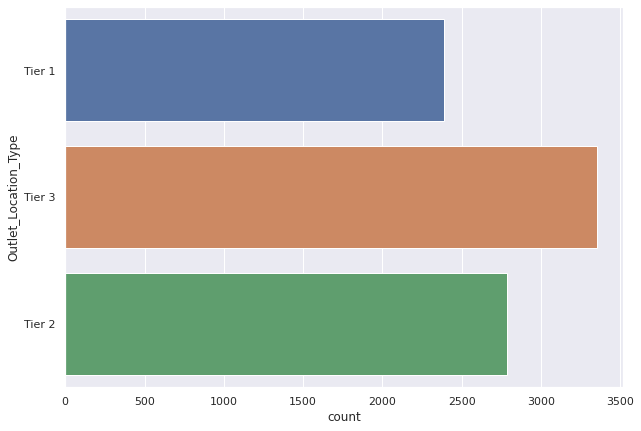

In [25]:
sns.countplot(data=category_df, y='Outlet_Location_Type')

In [26]:
category_df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [27]:
category_df.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [28]:
category_df['Item_Codes'] = category_df['Item_Identifier'].apply(lambda x:x[0:2])
category_df.Item_Codes.value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


FD    6125
NC    1599
DR     799
Name: Item_Codes, dtype: int64

In [29]:
category_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Codes
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,FD
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC


In [30]:
category_df['Outlet_Size'] = category_df['Outlet_Size'].fillna(category_df['Outlet_Size'].mode()[0])

category_df.isna().any()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Item_Identifier         False
Item_Fat_Content        False
Item_Type               False
Outlet_Identifier       False
Outlet_Size             False
Outlet_Location_Type    False
Outlet_Type             False
Item_Codes              False
dtype: bool

In [31]:
category_df.drop('Item_Identifier', axis=1, inplace=True)
numeric_df.drop('Outlet_Establishment_Year', axis=1, inplace=True)

category_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Codes
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,FD
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC


In [32]:
category_df['Item_Codes'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Codes, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dummy_df = category_df.apply(le.fit_transform)
dummy_df.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Codes
0,0,4,9,1,0,1,1
1,1,14,3,1,2,2,0
2,0,10,9,1,0,1,1
3,1,6,0,1,2,0,1
4,0,9,1,0,2,1,2


In [34]:
clean_df = pd.concat([numeric_df, dummy_df], axis=1)
clean_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Codes
0,9.30,0.016047,249.8092,3735.1380,23,0,4,9,1,0,1,1
1,5.92,0.019278,48.2692,443.4228,13,1,14,3,1,2,2,0
2,17.50,0.016760,141.6180,2097.2700,23,0,10,9,1,0,1,1
3,19.20,0.066132,182.0950,732.3800,24,1,6,0,1,2,0,1
4,8.93,0.066132,53.8614,994.7052,35,0,9,1,0,2,1,2


<AxesSubplot:>

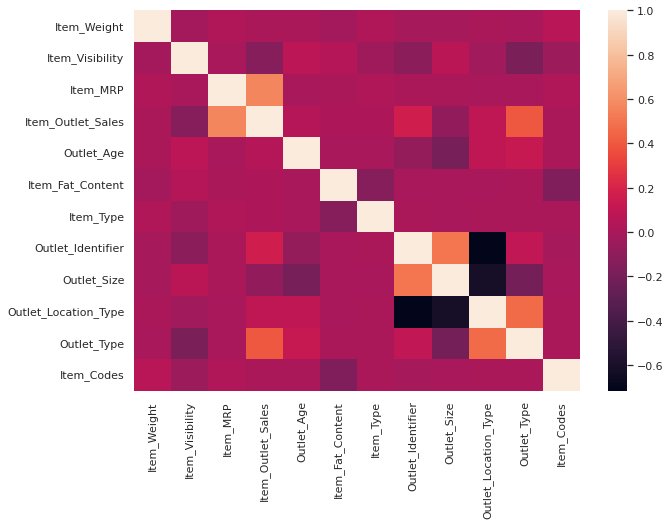

In [35]:
correlation = clean_df.corr()
sns.heatmap(correlation)

In [36]:
X = clean_df.drop('Item_Outlet_Sales', axis=1)
y = clean_df['Item_Outlet_Sales']

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

model = lr.fit(X, y)
model.score(X, y)

0.5103955000104184